In [1]:
import numpy as np
from datascience import *
from datetime import datetime
from scipy import stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import random
np.set_printoptions(threshold=np.inf)

In [3]:
#setup
#INPUT START
main_table1 = Table.read_table("/Users/jay/Desktop/Work/客群分析/data/訂單-1901_2103_short.csv")
#INPUT END
is_pet = []
for product in main_table1.column("多規格名稱一"):
    if ("狗" not in product and "貓" not in product and "寵物" not in product and "pet" not in product and "T-PET" not in product):
        is_pet.append("not pet product")
    else:
        is_pet.append("is pet product")
main_table1 = main_table1.with_column("pet product", is_pet)
main_table = main_table1.where("pet product", are.equal_to("not pet product")).where("購買人電子信箱", are.not_equal_to("nan"))

In [4]:
#new old distribution
#find distance
def month_of(time):
    if time[:4] == "2019":
        month = time[5:7]
        return month + "/2019"
    elif time[:4] == "2020":
        month = time[5:7]
        return month + "/2020" 
    elif time[:4] == "2021":
        month = time[5:7]
        return month + "/2021"
    else:
        return "error"   
month_array = main_table.apply(month_of, "購買日期")
month_table = main_table.with_column("distance", month_array)
#find existing users from 2017 and 2018
_existing_users = []
meta_dict = {}
more_months = ["01/2017", "02/2017", "03/2017", "04/2017", "05/2017", "06/2017", "07/2017", "08/2017", "09/2017", "10/2017", 
              "11/2017", "12/2017", "01/2018", "02/2018", "03/2018", "04/2018", "05/2018", "06/2018", "07/2018", "08/2018", 
               "09/2018", "10/2018", "11/2018", "12/2018", "01/2019", "02/2019", "03/2019", "04/2019", "05/2019", "06/2019", 
              "07/2019", "08/2019", "09/2019", "10/2019", "11/2019", "12/2019", "01/2020", "02/2020", "03/2020", "04/2020", 
              "05/2020", "06/2020", "07/2020", "08/2020", "09/2020", "10/2020", "11/2020", "12/2020", "01/2021", "02/2021", "03/2021"]
months = ["01/2019", "02/2019", "03/2019", "04/2019", "05/2019", "06/2019", "07/2019", "08/2019", "09/2019", "10/2019", "11/2019", 
          "12/2019","01/2020", "02/2020", "03/2020", "04/2020", "05/2020", "06/2020", "07/2020", "08/2020", "09/2020", "10/2020", "11/2020", 
          "12/2020", "01/2021", "02/2021", "03/2021"]
for month in more_months:
    meta_dict[month] = {"new users": [],
                        "old users": [],
                        "old users bought": []}
existing_users_2 = []
def month_helper(string):
    if "2017/1/" in string:
        return "01/2017"
    elif "2017/2/" in string:
        return "02/2017"
    elif "2017/3/" in string:
        return "03/2017"
    elif "2017/4/" in string:
        return "04/2017"
    elif "2017/5/" in string:
        return "05/2017"
    elif "2017/6/" in string:
        return "06/2017"
    elif "2017/7/" in string:
        return "07/2017"
    elif "2017/8/" in string:
        return "08/2017"
    elif "2017/9/" in string:
        return "09/2017"
    elif "2017/10/" in string:
        return "10/2017"
    elif "2017/11/" in string:
        return "11/2017"
    elif "2017/12/" in string:
        return "12/2017"
    elif "2018/01/" in string:
        return "01/2018"
    elif "2018/02/" in string:
        return "02/2018"
    elif "2018/03/" in string:
        return "03/2018"
    elif "2018/04/" in string:
        return "04/2018"
    elif "2018/05/" in string:
        return "05/2018"
    elif "2018/06/" in string:
        return "06/2018"
    elif "2018/07/" in string:
        return "07/2018"
    elif "2018/08/" in string:
        return "08/2018"
    elif "2018/09/" in string:
        return "09/2018"
    elif "2018/10/" in string:
        return "10/2018"
    elif "2018/11/" in string:
        return "11/2018"
    elif "2018/12/" in string:
        return "12/2018"
    elif "2018-10-" in string:
        return "10/2018"
    elif "2018-11-" in string:
        return "11/2018"
    elif "2018-12-" in string:
        return "12/2018"
    else:
        return None
    
table_2017 = Table.read_table("/Users/jay/Desktop/Work/客群分析/data/Online customer list 2017.csv")
for i in range(table_2017.num_rows):
    number = table_2017.column("phone number")[i]
    if "+886" in number:
        number = "0" + table_2017.column("phone number")[i][5:]
    if "-" in number:
        number = number.replace("-", "")
        number = "0" + number
    if number not in _existing_users and len(number)== 10: 
        _existing_users.append(number)
    
    curr_month = month_helper(table_2017.column("time")[i])
    if curr_month != None:
        if number not in existing_users_2 and number not in meta_dict[curr_month]["new users"]:
            meta_dict[curr_month]["new users"].append(number)
            existing_users_2.append(number)
        elif number in existing_users_2 and number not in meta_dict[curr_month]["old users bought"]:
            meta_dict[curr_month]["old users bought"].append(number)
              
table_2018 = Table.read_table("/Users/jay/Desktop/Work/客群分析/data/Online customer list 2018.csv")
for i in range(table_2018.num_rows):
    number = table_2018.column("phonne number")[i]
    if "+886" in table_2018.column("phonne number")[i]:
        number = "0" + table_2018.column("phonne number")[i][4:]
    if number not in _existing_users and len(number) == 10:
        _existing_users.append(number)
    
    curr_month = month_helper(table_2018.column("time")[i])
    if curr_month != None:
        if number not in existing_users_2 and number not in meta_dict[curr_month]["new users"]:
            meta_dict[curr_month]["new users"].append(number)
            existing_users_2.append(number)
        elif number in existing_users_2 and number not in meta_dict[curr_month]["old users bought"]:
            meta_dict[curr_month]["old users bought"].append(number)    

In [5]:
#month and meta dict
def phone(floatt):
    return "0" + str(int(floatt))
_total_users = []
_old_users = []
_new_users = []
_total_orders = []
_old_user_orders = []
_new_user_orders = []
_total_expenditure = []
_old_user_expenditure = []
_new_user_expenditure = []
existing_users = _existing_users[:]
new_user_order_avg = []
#loop months
for apr in months:
    apr_table = month_table.where("distance", are.equal_to(apr))
    apr_users = []
    apr_num = []
    new_users_list = []
    old_users_bought_list = []
    total_users = 0
    old_users = 0
    new_users = 0
    total_orders = 0
    old_user_orders = 0
    new_user_orders = 0
    total_expenditure = 0
    old_user_expenditure = 0
    new_user_expenditure = 0
    #loop orders
    for i in range(apr_table.num_rows):
        if apr_table.column("訂單編號")[i] not in apr_num:
            apr_num.append(apr_table.column("訂單編號")[i])
            #check new user
            phone_num = phone(apr_table.column("購買人電話")[i])
            if phone_num not in apr_users and phone_num not in existing_users:
                
                apr_users.append(phone_num)
                existing_users.append(phone_num)
                new_users += 1
                total_users += 1
                new_users_list.append(phone_num)
                new_user_orders += 1
                new_user_expenditure += apr_table.column("總計")[i]
                
                new_user_order_avg.append(apr_table.column("總計")[i])

            #old user havent bought
            elif phone_num not in apr_users and phone_num in existing_users:
                
                apr_users.append(phone_num)
                old_users += 1
                total_users += 1
                old_users_bought_list.append(phone_num)

                old_user_orders += 1

                old_user_expenditure += apr_table.column("總計")[i]        
                
            #old user buying second time
            elif phone_num in apr_users and phone_num in existing_users:
                
                old_user_orders += 1

                old_user_expenditure += apr_table.column("總計")[i]
                
            total_orders += 1
            total_expenditure += apr_table.column("總計")[i]
        
    _total_users.append(total_users)
    _old_users.append(old_users)
    _new_users.append(new_users)
    _total_orders.append(total_orders)
    _old_user_orders.append(old_user_orders)
    _new_user_orders.append(new_user_orders)
    _total_expenditure.append(total_expenditure)
    _old_user_expenditure.append(old_user_expenditure)
    _new_user_expenditure.append(new_user_expenditure)

    meta_dict[apr]["old users"] = existing_users[:]
    meta_dict[apr]["old users bought"] = old_users_bought_list[:]
    meta_dict[apr]["new users"] = new_users_list[:]
              

In [6]:
distribution_table = Table().with_columns("月份", months,
                                          "舊客戶數", _old_users, 
                                          "新客戶數", _new_users, 
                                          "總客戶數", _total_users,
                                          "舊客戶訂單數", _old_user_orders,
                                          "新客戶訂單數", _new_user_orders,
                                          "總訂單數", _total_orders, 
                                          "舊客戶消費金額", _old_user_expenditure, 
                                          "新客戶消費金額", _new_user_expenditure, 
                                          "總消費金額", _total_expenditure )
distribution_table.show()
#EXPORT
#user_data_table.to_csv("月營收表格.csv")

月份,舊客戶數,新客戶數,總客戶數,舊客戶訂單數,新客戶訂單數,總訂單數,舊客戶消費金額,新客戶消費金額,總消費金額
01/2019,485,1717,2202,778,1717,2495,761202,1536839,2298041
02/2019,388,1220,1608,535,1220,1755,543565,1089814,1633379
03/2019,495,1398,1893,735,1398,2133,727259,1284241,2011500
04/2019,494,1022,1516,666,1022,1688,647680,915769,1563449
05/2019,729,1171,1900,1011,1171,2182,1048873,1080980,2129853
06/2019,733,1228,1961,988,1228,2216,947799,1086633,2034432
07/2019,920,1657,2577,1262,1657,2919,1219099,1419090,2638189
08/2019,945,2088,3033,1319,2088,3407,1275274,1758178,3033452
09/2019,982,1383,2365,1263,1383,2646,1223903,1195596,2419499
10/2019,825,927,1752,1017,927,1944,1043809,862113,1905922


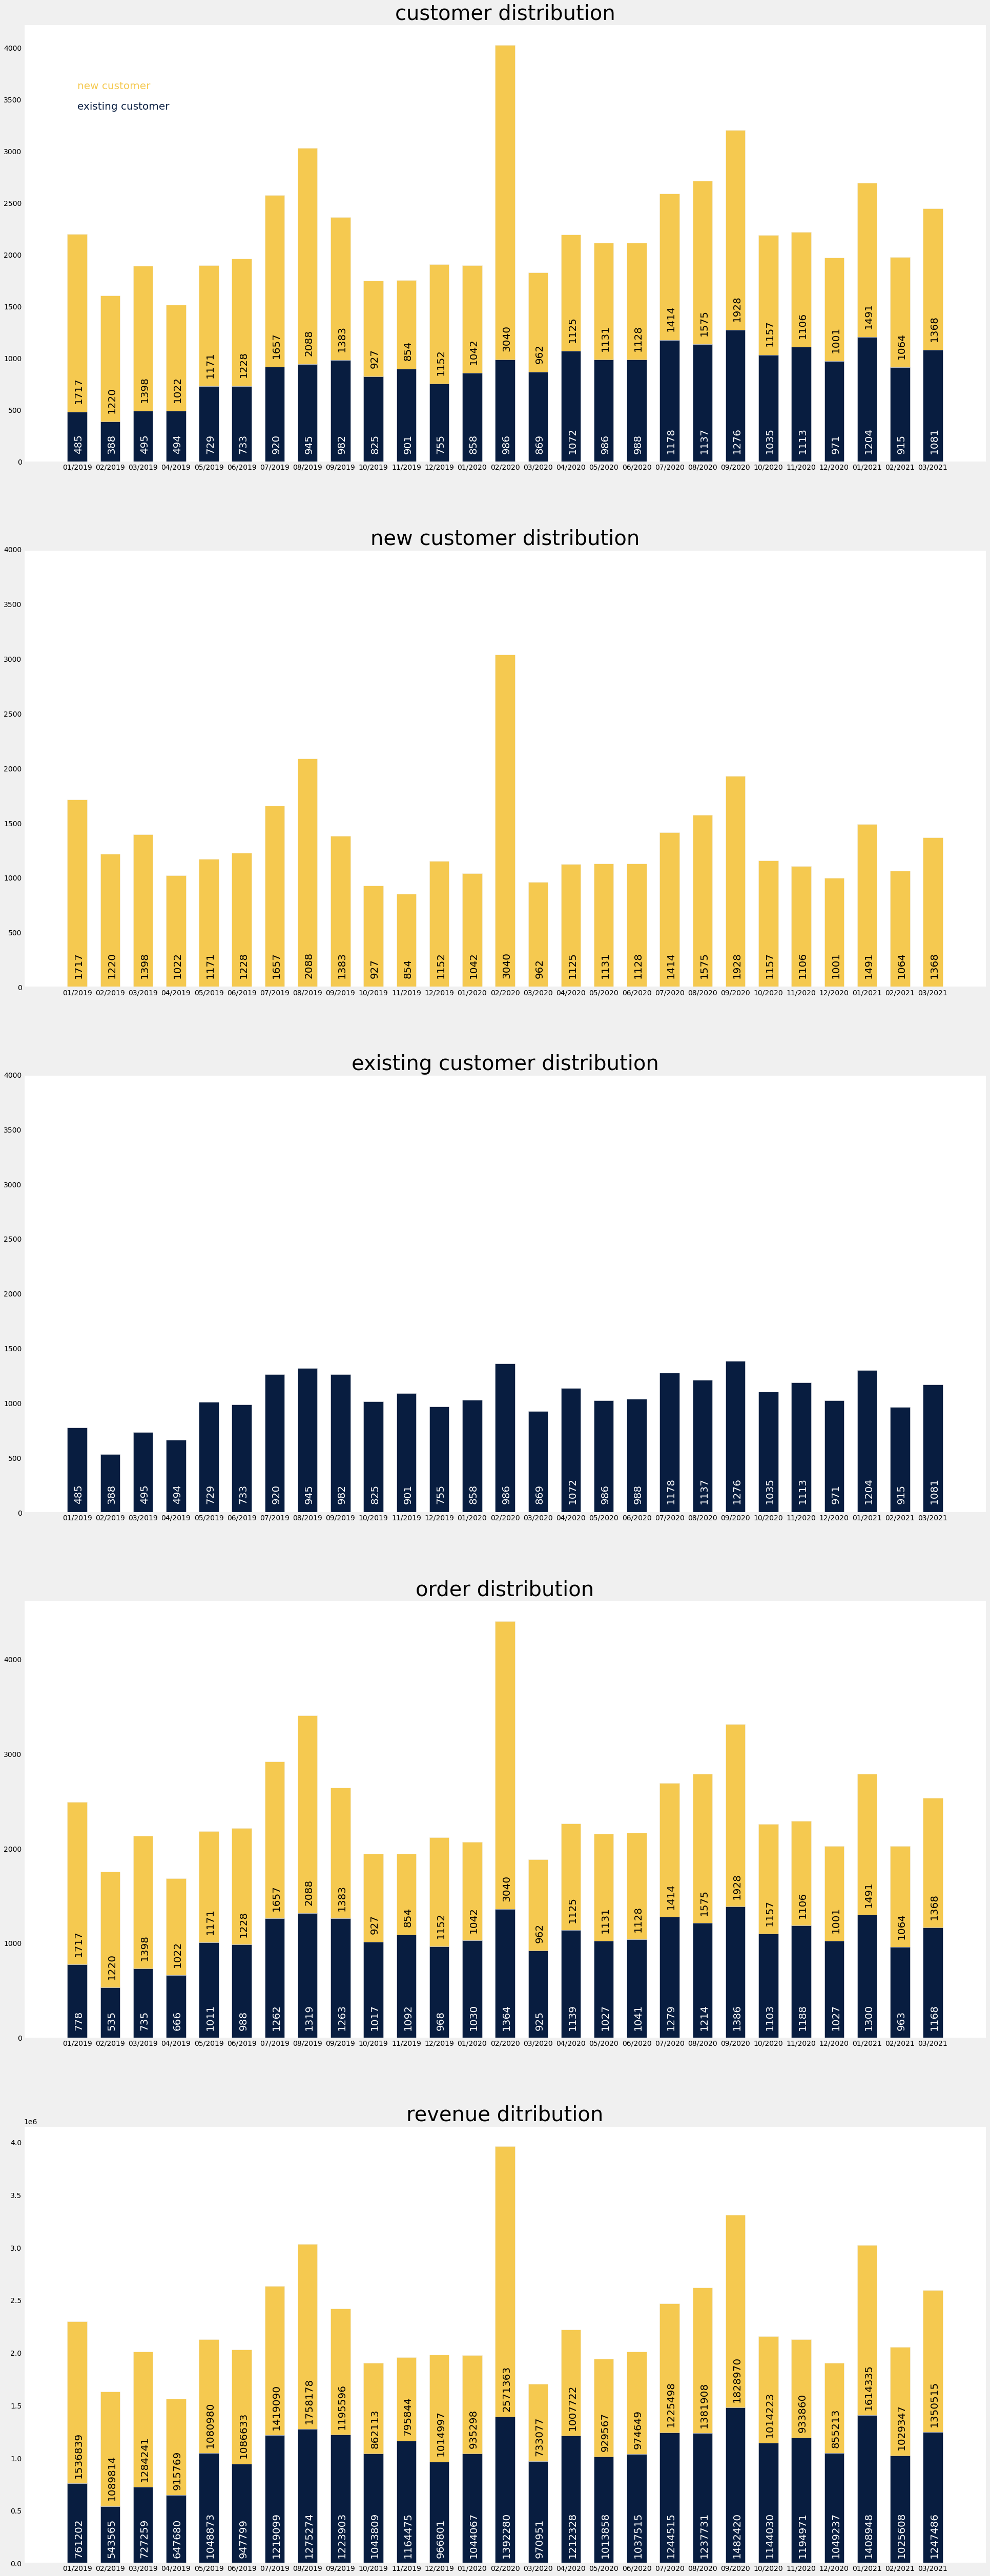

In [7]:
#INPUT START
label = True
#INPUT END

blue = "#081d40"
yellow = "#f5c950"

graph, (plot1, plot4, plot5, plot2, plot3) = plots.subplots(5)
graph.set_size_inches(30, 85)
wd = 0.6
plot1.set_title("customer distribution", size = 40)
plot1.set_facecolor("white")
plot1.annotate("new customer", (0,3600), size = 20, color = yellow)
plot1.annotate("existing customer", (0,3400), size = 20, color = blue)
plot1.grid(False)
plot1.bar(months, _new_users, color = yellow, bottom = _old_users, width=wd, )
plot1.bar(months, _old_users, color = blue, width=wd)

plot2.set_title("order distribution", size = 40)
plot2.set_facecolor("white")
plot2.grid(False)
plot2.bar(months, _new_user_orders, color = yellow, bottom = _old_user_orders, width=wd)
plot2.bar(months, _old_user_orders, color = blue, width=wd)

plot3.set_title("revenue ditribution", size = 40)
plot3.set_facecolor("white")
plot3.grid(False)
plot3.bar(months, _new_user_expenditure, color = yellow, bottom = _old_user_expenditure, width=wd)
plot3.bar(months, _old_user_expenditure, color = blue, width=wd)

plot4.set_title("new customer distribution", size = 40)
plot4.set_facecolor("white")
plot4.grid(False)
plot4.set_ylim([0, 4000])
plot4.bar(months, _new_user_orders, color = yellow, width=wd)

plot5.set_title("existing customer distribution", size = 40)
plot5.set_facecolor("white")
plot5.grid(False)
plot5.set_ylim([0, 4000])
plot5.bar(months, _old_user_orders, color = blue, width=wd)

if label:
    for i in range(len(_new_users)):
        plot1.annotate(str(_new_users[i]), (i-0.1, _old_users[i] + 100), size = 20, color = "black", rotation = "vertical")
        plot1.annotate(str(_old_users[i]), (i-0.1, 100), size = 20, color = "white", rotation = "vertical")
    for i in range(len(_new_user_orders)):
        plot2.annotate(str(_new_user_orders[i]), (i-0.1, _old_user_orders[i] + 100), size = 20, color = "black", rotation = "vertical")
        plot2.annotate(str(_old_user_orders[i]), (i-0.1, 100), size = 20, color = "white", rotation = "vertical")
    for i in range(len(_new_user_expenditure)):
        plot3.annotate(str(_new_user_expenditure[i]), (i-0.1, _old_user_expenditure[i] + 70000), size = 20, color = "black", rotation = "vertical")
        plot3.annotate(str(_old_user_expenditure[i]), (i-0.1, 70000), size = 20, color = "white", rotation = "vertical")
    for i in range(len(_new_user_expenditure)):
        plot4.annotate(str(_new_users[i]), (i-0.1, 100), size = 20, color = "black", rotation = "vertical")
    for i in range(len(_new_user_expenditure)):
        plot5.annotate(str(_old_users[i]), (i-0.1, 100), size = 20, color = "white", rotation = "vertical")

#EXPORT
#graph.savefig("customer distribution.png")
#消費者分佈、訂單數分佈、營收分佈

In [8]:
new_user_stays = []
new_user_gone = []
old_user_stays = []
old_user_gone = []
for i in range(len(more_months)):
    apr = more_months[i]
    _new_user_stays = 0
    _new_user_gone = 0
    _old_user_stays = 0
    _old_user_gone = 0
    if i + 3 < len(more_months):
        may = more_months[i+1]
        jun = more_months[i+2]
        jul = more_months[i+3]
        for new_user in meta_dict[apr]["new users"]:
            if new_user in meta_dict[may]["old users bought"]:
                _new_user_stays += 1
            elif new_user in meta_dict[jun]["old users bought"]:
                _new_user_stays += 1
            elif new_user in meta_dict[jul]["old users bought"]:
                _new_user_stays += 1
            else:
                _new_user_gone += 1
        for old_user in meta_dict[apr]["old users bought"]:
            if old_user in meta_dict[may]["old users bought"]:
                _old_user_stays += 1
            elif old_user in meta_dict[jun]["old users bought"]:
                _old_user_stays += 1
            elif old_user in meta_dict[jul]["old users bought"]:
                _old_user_stays += 1
            else:
                _old_user_gone += 1
    else:
        for new_user in meta_dict[apr]["new users"]:
            _new_user_gone += 1
        for old_user in meta_dict[apr]["old users bought"]:
            _old_user_gone += 1
    
    new_user_stays.append(_new_user_stays)
    new_user_gone.append(_new_user_gone)
    old_user_stays.append(_old_user_stays)
    old_user_gone.append(_old_user_gone)
    
grand_new_user_list = []
grand_old_user_list = []
grand_total_user_list = []
for month in meta_dict.keys():
    grand_new_user_list.append(len(meta_dict[month]["new users"]))
    grand_old_user_list.append(len(meta_dict[month]["old users bought"]))
    grand_total_user_list.append(len(meta_dict[month]["new users"]) + len(meta_dict[month]["old users bought"]))


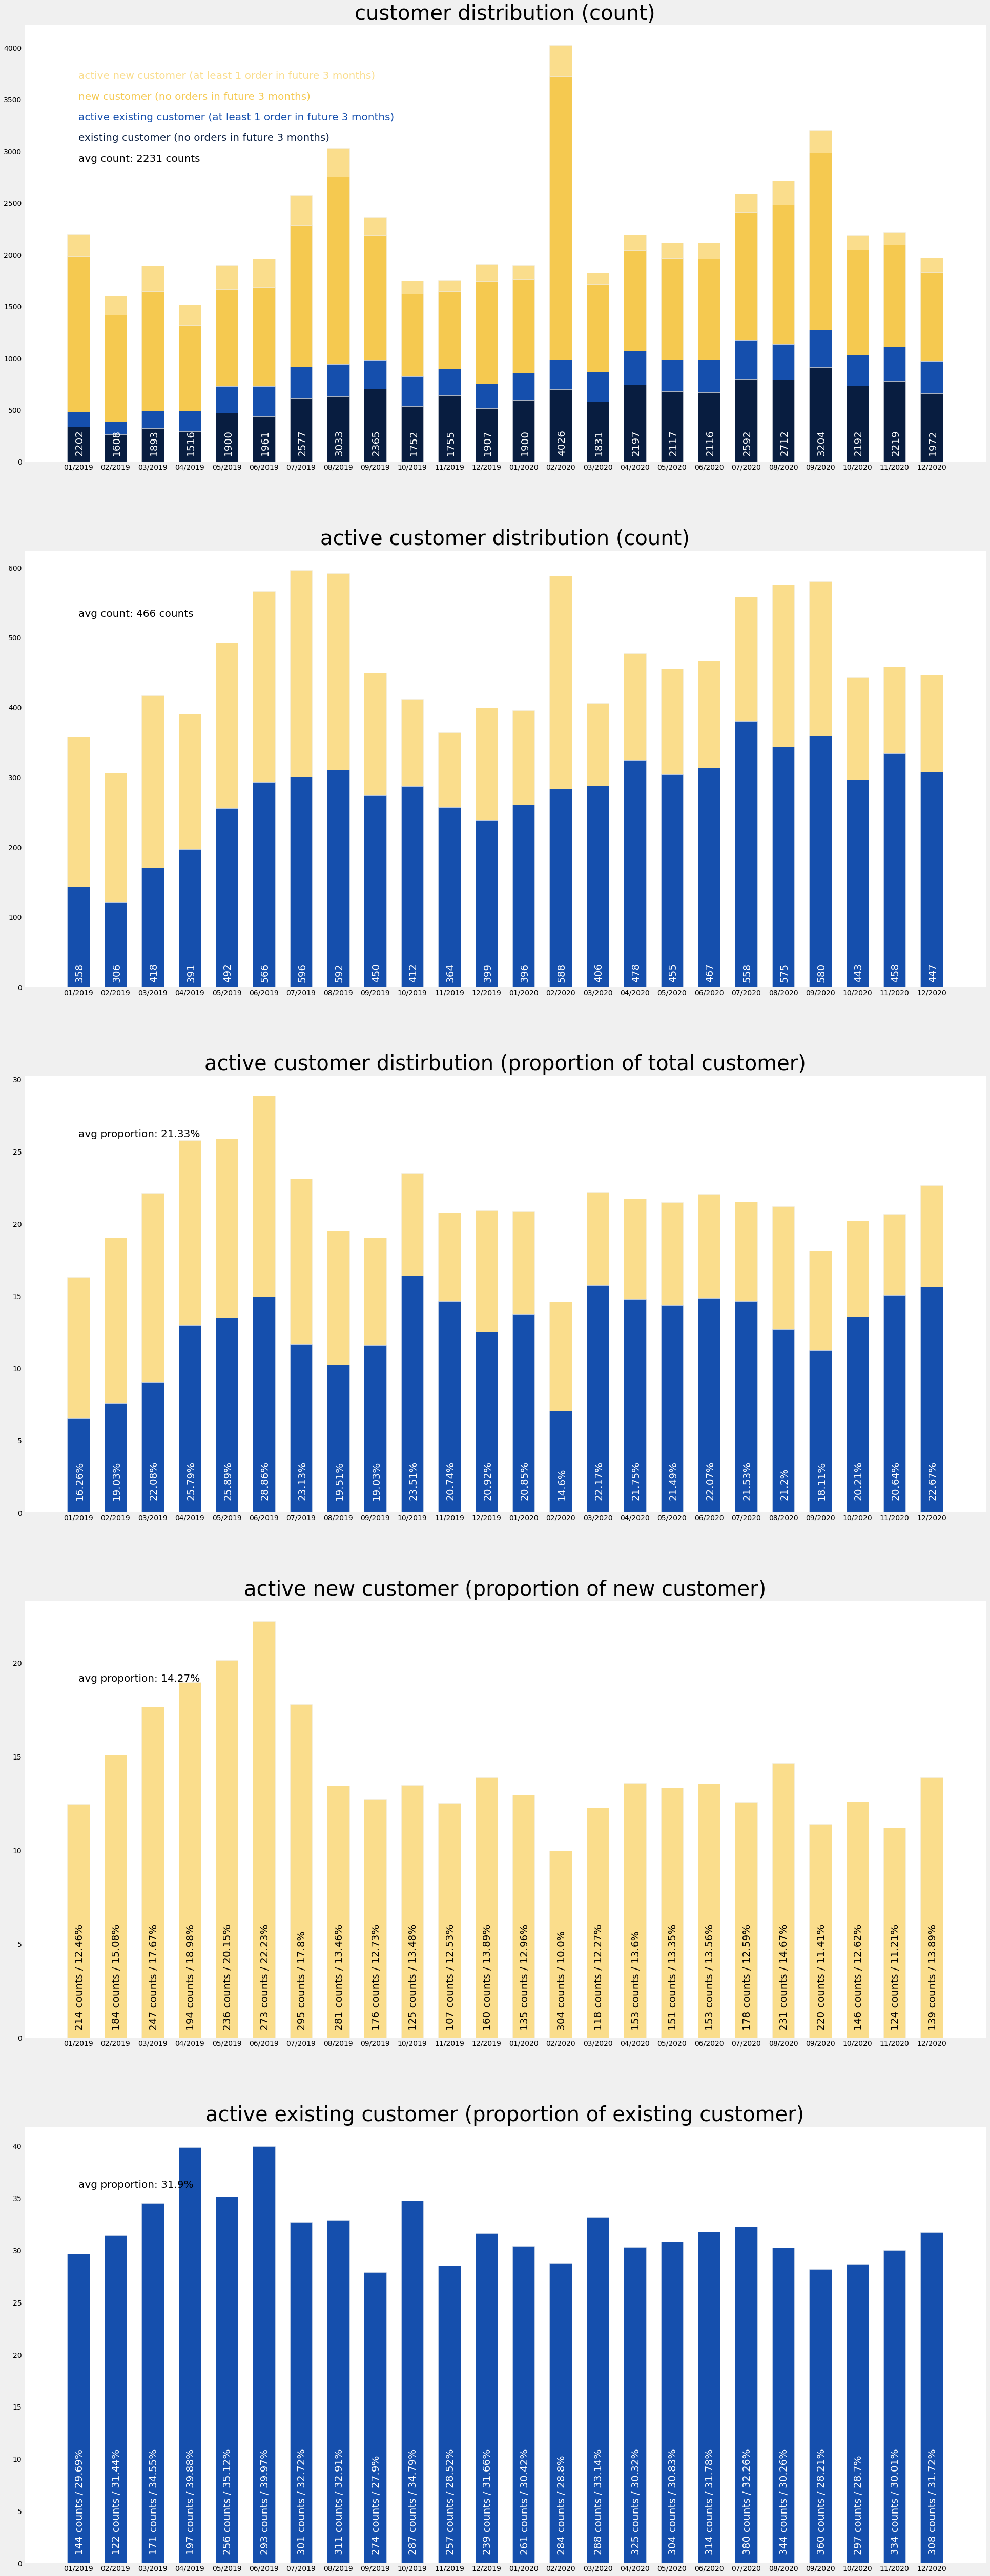

In [9]:
#INPUT START
label1 = True
n = 24
#INPUT END

yellow1 = "#fadd8c"
blue1 = "#154fad"

_new_user_stays = new_user_stays[n:]
_new_user_gone = new_user_gone[n:]
_old_user_stays = old_user_stays[n:]
_old_user_gone = old_user_gone[n:]
_new_users_tempp = grand_new_user_list[n:]
_old_users_tempp = grand_old_user_list[n:]
_total_users_tempp = grand_total_user_list[n:]

h1 = []
h2 = []
h10 = []
for i in range(len(more_months)):
    h1.append(new_user_gone[i] + old_user_stays[i] + old_user_gone[i])
    h2.append(old_user_stays[i] + old_user_gone[i])
    h10.append(new_user_stays[i] + old_user_stays[i])
graph, (plot1, plot4, plot5, plot2, plot3) = plots.subplots(5)
graph.set_size_inches(30, 85)
wd = 0.6
plot1.set_title("customer distribution (count)", size = 40)
plot1.set_facecolor("white")
plot1.annotate("active new customer (at least 1 order in future 3 months)", (0,3700), size = 20, color = yellow1)
plot1.annotate("new customer (no orders in future 3 months)", (0,3500), size = 20, color = yellow)
plot1.annotate("active existing customer (at least 1 order in future 3 months)", (0,3300), size = 20, color = blue1)
plot1.annotate("existing customer (no orders in future 3 months)", (0,3100), size = 20, color = blue)
tempsum = sum(_total_users_tempp[:-3])
templen = len(_total_users_tempp[:-3])
plot1.annotate("avg count: " + str( int(tempsum / templen)) + " counts", (0,2900), size = 20, color = "black")
plot1.grid(False)
plot1.bar(more_months[n:-3], _new_user_stays[:-3], color = yellow1, bottom = h1[n:-3], width=wd)
plot1.bar(more_months[n:-3], _new_user_gone[:-3], color = yellow, bottom = h2[n:-3], width=wd)
plot1.bar(more_months[n:-3], _old_user_stays[:-3], color = blue1, bottom = _old_user_gone[:-3], width=wd)
plot1.bar(more_months[n:-3], _old_user_gone[:-3], color = blue, width=wd)
# if n < 24:
#     xx = 24 - n - 0.5
#     yy = 2700
#     plot1.plot([xx, xx], [0, yy], color = "grey", lw = 1, alpha = 1)

p1 = []
for i in range(len(_new_user_stays)):
    p1.append(np.round(_new_user_stays[i] / _new_users_tempp[i] * 100, 2))
plot2.set_title("active new customer (proportion of new customer)", size = 40)
plot2.annotate("avg proportion: " + str(np.round(sum(p1) / (len(p1)-3), 2)) + "%", (0,19), size = 20, color = "black")
plot2.set_facecolor("white")
plot2.grid(False)
plot2.bar(more_months[n:-3], p1[:-3], color = yellow1, width=wd)

p2 = []
for i in range(len(_old_user_stays)):
    p2.append(np.round(_old_user_stays[i] / _old_users_tempp[i] * 100, 2))
plot3.set_title("active existing customer (proportion of existing customer)", size = 40)
plot3.annotate("avg proportion: " + str(np.round(sum(p2) / (len(p2)-3), 2)) + "%", (0,36), size = 20, color = "black")
plot3.set_facecolor("white")
plot3.grid(False)
plot3.bar(more_months[n:-3], p2[:-3], color = blue1, width=wd)

plot4.set_title("active customer distribution (count)", size = 40)
plot4.set_facecolor("white")
plot4.grid(False)
plot4.annotate("avg count: " + str(int(sum(h10[n:- 3]) / len(h10[n:- 3]))) + " counts", (0, 530), size = 20, color = "black")
plot4.bar(more_months[n:-3], _new_user_stays[:-3], bottom = _old_user_stays[:-3], color = yellow1, width=wd)
plot4.bar(more_months[n:-3], _old_user_stays[:-3], color = blue1, width=wd)

p6 = []
p7 = []
p8 = []
for i in range(len(_old_user_stays)):
    p6.append(np.round(_new_user_stays[i] / _total_users_tempp[i] * 100, 2) + 
              np.round(_old_user_stays[i] / _total_users_tempp[i] * 100, 2))
    p7.append(np.round(_new_user_stays[i] / _total_users_tempp[i] * 100, 2))
    p8.append(np.round(_old_user_stays[i] / _total_users_tempp[i] * 100, 2))
plot5.set_title("active customer distirbution (proportion of total customer)", size = 40)
plot5.set_facecolor("white")
plot5.grid(False)
plot5.annotate("avg proportion: " + str(np.round(sum(p6[:- 3]) / len(p6[:- 3]), 2)) + "%", (0, 26), size = 20, color = "black")
plot5.bar(more_months[n:-3], p7[:-3], bottom = p8[:-3], color = yellow1, width=wd)
plot5.bar(more_months[n:-3], p8[:-3], color = blue1, width=wd)

if label1:
    for i in range(len(_new_user_stays) - 3):
        plot1.annotate((str(_total_users_tempp[i]))
                        , (i-0.1, 80), size = 20, color = "white", rotation = "vertical")
    for i in range(len(_new_user_stays) - 3):
        plot2.annotate((str(_new_user_stays[i]) + " counts / " + str(p1[i]) + "%")
                        , (i-0.1, 0.5), size = 20, color = "black", rotation = "vertical")
    for i in range(len(_old_user_stays) - 3):
        plot3.annotate((str(_old_user_stays[i]) + " counts / " + str(p2[i]) + "%")
                        , (i-0.1, 1), size = 20, color = "white", rotation = "vertical")
    for i in range(len(_old_user_stays) - 3):
        plot4.annotate((str(h10[n:][i]))
                        , (i-0.1, 10), size = 20, color = "white", rotation = "vertical")
    for i in range(len(p6) - 3):
        plot5.annotate((str(np.round(p6[:-3][i], 2)) + "%")
                        , (i-0.1, 1), size = 20, color = "white", rotation = "vertical")
#graph.savefig("active customer forward.png")
#活躍消費者分佈（未來向）

In [10]:
old_user_from_3 = []
old_user_from_6 = []
old_user_from_9 = []
old_user_rest = []
for i in range(len(more_months)):
    octo = more_months[i]
    _old_user_from_3 = 0
    _old_user_from_6 = 0
    _old_user_from_9 = 0
    _old_user_rest = 0
    if i - 9 > 0:
        sep = more_months[i-1]
        aug = more_months[i-2]
        jul = more_months[i-3]
        jun = more_months[i-4]
        may = more_months[i-5]
        apr = more_months[i-6]
        mar = more_months[i-7]
        feb = more_months[i-8]
        jan = more_months[i-9]
        
        for old_user in meta_dict[octo]["old users bought"]:
            if old_user in meta_dict[sep]["old users bought"]:
                _old_user_from_3 += 1
            elif old_user in meta_dict[aug]["old users bought"]:
                _old_user_from_3 += 1
            elif old_user in meta_dict[jul]["old users bought"]:
                _old_user_from_3 += 1
            elif old_user in meta_dict[jun]["old users bought"]:
                _old_user_from_6 += 1
            elif old_user in meta_dict[may]["old users bought"]:
                _old_user_from_6 += 1
            elif old_user in meta_dict[apr]["old users bought"]:
                _old_user_from_6 += 1
            elif old_user in meta_dict[mar]["old users bought"]:
                _old_user_from_9 += 1
            elif old_user in meta_dict[feb]["old users bought"]:
                _old_user_from_9 += 1
            elif old_user in meta_dict[jan]["old users bought"]:
                _old_user_from_9 += 1
            else:
                _old_user_rest += 1
    
    old_user_from_3.append(_old_user_from_3)
    old_user_from_6.append(_old_user_from_6)
    old_user_from_9.append(_old_user_from_9)
    old_user_rest.append(_old_user_rest)

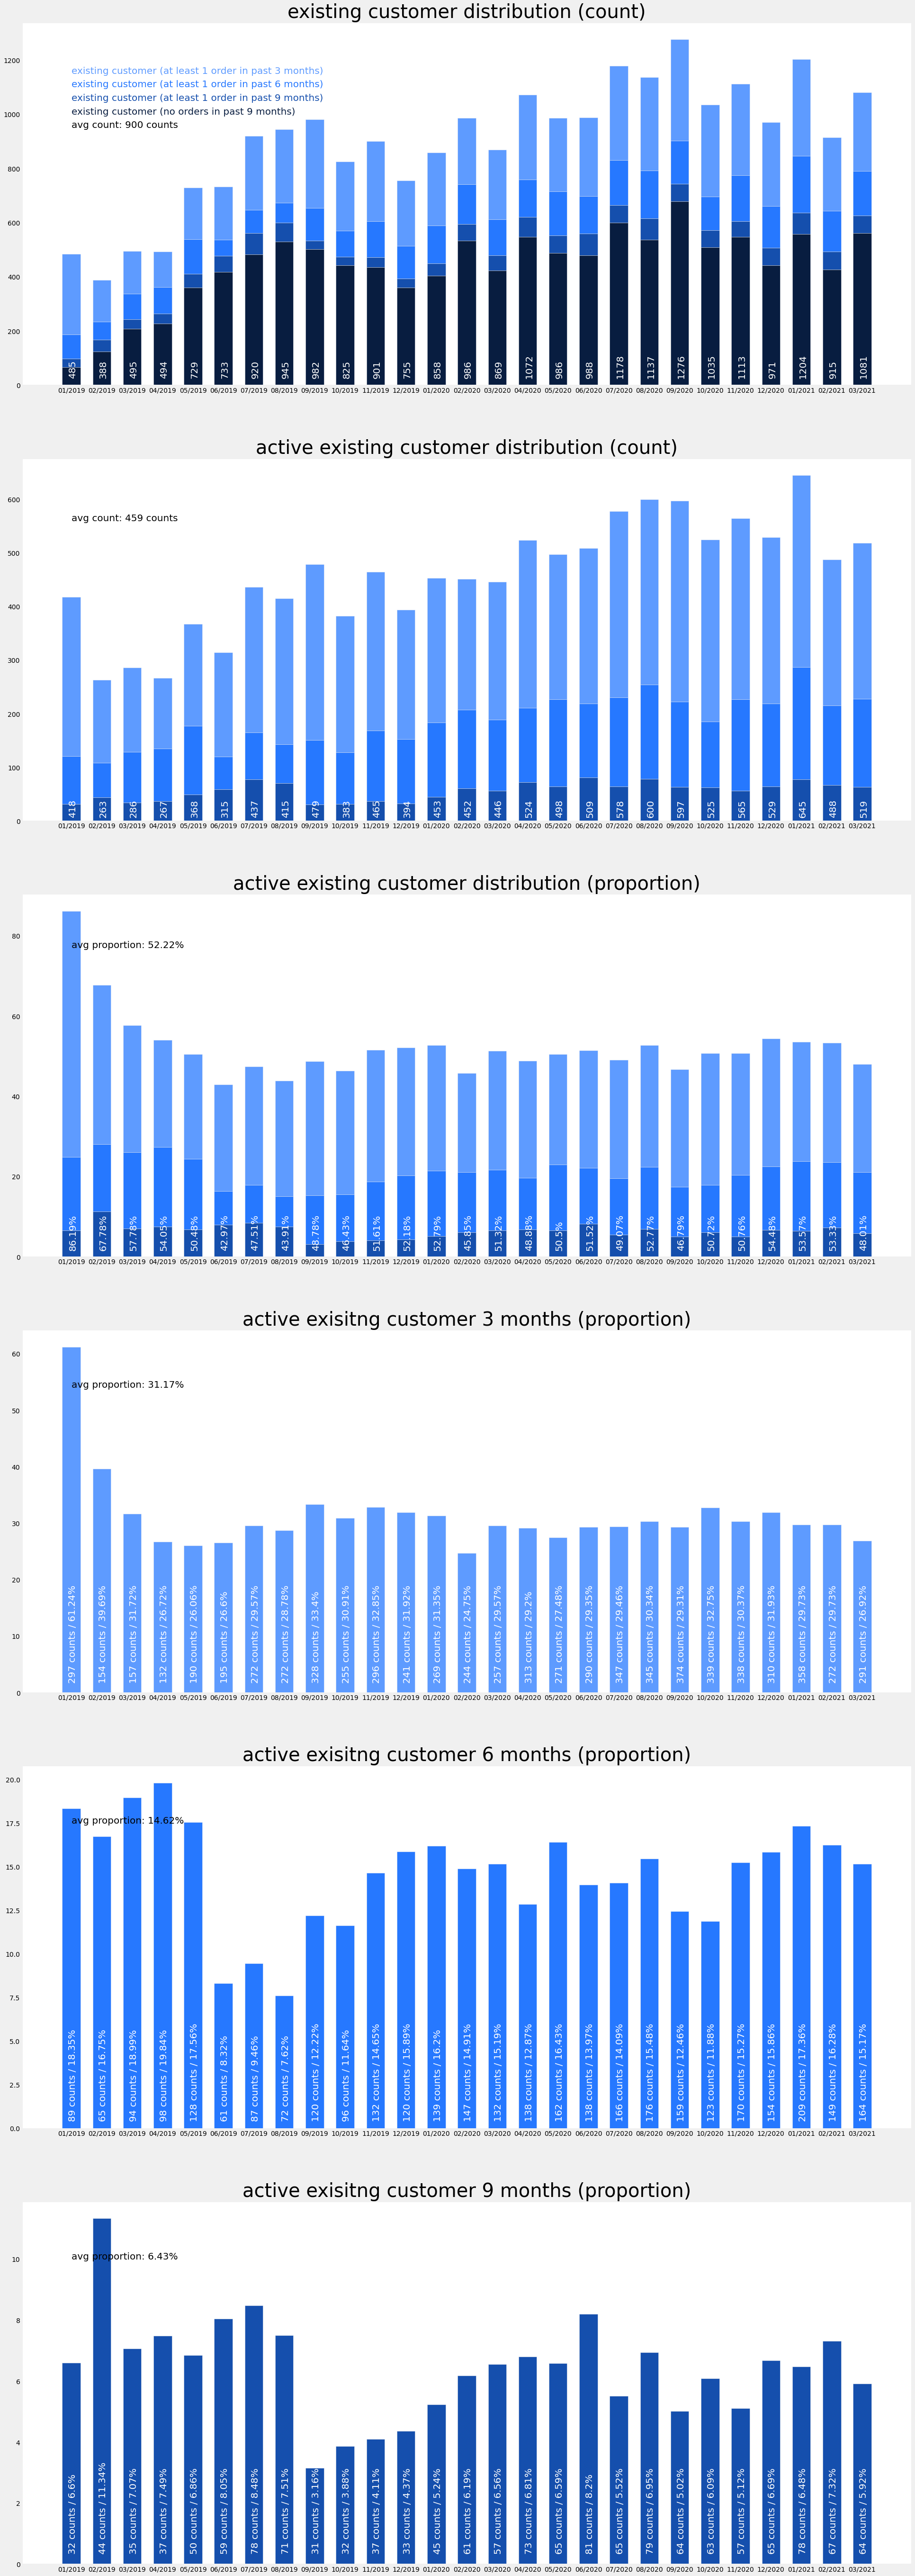

In [11]:
#INPUT START
label1 = True
n = 24
#INPUT END

blue1 = "#5e9bff"
blue2 = "#2678ff"
blue3 = "#154fad"

h3 = []
h4 = []
h5 = []
for i in range(len(more_months)):
    h3.append(old_user_from_6[i] + old_user_from_9[i] + old_user_rest[i])
    h4.append(old_user_from_9[i] + old_user_rest[i])
    h5.append(old_user_from_6[i] + old_user_from_9[i])

graph, (plot1, plot5, plot6, plot2, plot3, plot4) = plots.subplots(6)
graph.set_size_inches(30, 92)
wd = 0.6
_old_user_from_3 = old_user_from_3[n:]
_old_user_from_6 = old_user_from_6[n:]
_old_user_from_9 = old_user_from_9[n:]
_old_user_rest = old_user_rest[n:]
_old_users_temp = grand_old_user_list[n:]
plot1.set_title("existing customer distribution (count)", size = 40)
plot1.set_facecolor("white")
plot1.annotate("existing customer (at least 1 order in past 3 months)", (0,1150), size = 20, color = blue1)
plot1.annotate("existing customer (at least 1 order in past 6 months)", (0,1100), size = 20, color = blue2)
plot1.annotate("existing customer (at least 1 order in past 9 months)", (0,1050), size = 20, color = blue3)
plot1.annotate("existing customer (no orders in past 9 months)", (0,1000), size = 20, color = blue)
plot1.annotate("avg count: " + str(int(sum(_old_users_temp) / len(_old_users_temp))) + " counts", (0,950), size = 20, color = "black")
plot1.grid(False)
plot1.bar(more_months[n:], _old_user_from_3, color = blue1, bottom = h3[n:], width=wd)
plot1.bar(more_months[n:], _old_user_from_6, color = blue2, bottom = h4[n:], width=wd)
plot1.bar(more_months[n:], _old_user_from_9, color = blue3, bottom = old_user_rest[n:], width=wd)
plot1.bar(more_months[n:], _old_user_rest, color = blue, width=wd)

p3 = []
for i in range(len(_old_user_from_3)):
    p3.append(np.round(_old_user_from_3[i] / _old_users_temp[i] * 100, 2))
plot2.set_title("active exisitng customer 3 months (proportion)", size = 40)
plot2.annotate("avg proportion: " + str(np.round(sum(p3) / (len(p3)), 2)) + "%", (0,54), size = 20, color = "black")
plot2.set_facecolor("white")
plot2.grid(False)
plot2.bar(more_months[n:], p3, color = blue1, width=wd)

p4 = []
for i in range(len(_old_user_from_6)):
    p4.append(np.round(_old_user_from_6[i] / _old_users_temp[i] * 100, 2))
plot3.set_title("active exisitng customer 6 months (proportion)", size = 40)
plot3.annotate("avg proportion: " + str(np.round(sum(p4) / (len(p4)), 2)) + "%", (0,17.5), size = 20, color = "black")
plot3.set_facecolor("white")
plot3.grid(False)
plot3.bar(more_months[n:],p4, color = blue2, width=wd)

p5 = []
for i in range(len(_old_user_from_9)):
    p5.append(np.round(_old_user_from_9[i] / _old_users_temp[i] * 100, 2))
plot4.set_title("active exisitng customer 9 months (proportion)", size = 40)
plot4.annotate("avg proportion: " + str(np.round(sum(p5) / (len(p5)), 2)) + "%", (0,10), size = 20, color = "black")
plot4.set_facecolor("white")
plot4.grid(False)
plot4.bar(more_months[n:], p5, color = blue3, width=wd)

h7 = []
h8 = []
h9 = []
for i in range(len(p3)):
    h7.append(p4[i] + p5[i])
    h8.append(p3[i] + p4[i] + p5[i])
    h9.append(_old_user_from_3[i] + _old_user_from_6[i] + _old_user_from_9[i])
    
plot5.set_title("active existing customer distribution (count)", size = 40)
plot5.set_facecolor("white")
plot5.grid(False)
plot5.annotate("avg count: " + str(int(sum(h9) / len(h9))) + " counts", (0,560), size = 20, color = "black")
plot5.bar(more_months[n:], _old_user_from_3, bottom = h5[n:], color = blue1, width=wd)
plot5.bar(more_months[n:], _old_user_from_6, bottom = _old_user_from_9, color = blue2, width=wd)
plot5.bar(more_months[n:], _old_user_from_9, color = blue3, width=wd)

plot6.set_title("active existing customer distribution (proportion)", size = 40)
plot6.set_facecolor("white")
plot6.grid(False)
plot6.annotate("avg proportion: " + str(np.round(sum(h8) / len(h8),2)) + "%", (0,77), size = 20, color = "black")
plot6.bar(more_months[n:], p3, bottom = h7, color = blue1, width=wd)
plot6.bar(more_months[n:], p4, bottom = p5, color = blue2, width=wd)
plot6.bar(more_months[n:], p5, color = blue3, width=wd)

if label1:
    for i in range(len(p5)):
        plot1.annotate(str(_old_users_temp[i]), (i-0.1, 32), size = 20, color = "white", rotation = "vertical")
        
    for i in range(len(_old_user_from_3)):
        plot2.annotate((str(_old_user_from_3[i]) + " counts / " + str(p3[i]) + "%")
                        , (i-0.1, 2), size = 20, color = "white", rotation = "vertical")
    for i in range(len(_old_user_from_6)):
        plot3.annotate((str(_old_user_from_6[i]) + " counts / " + str(p4[i]) + "%")
                        , (i-0.1, 0.5), size = 20, color = "white", rotation = "vertical")
    for i in range(len(_old_user_from_9)):
        plot4.annotate((str(_old_user_from_9[i]) + " counts / " + str(p5[i]) + "%")
                        , (i-0.1, 0.4), size = 20, color = "white", rotation = "vertical")
    for i in range(len(p5)):
        plot5.annotate(str(h9[i]), (i-0.1, 10), size = 20, color = "white", rotation = "vertical")
        
    for i in range(len(p5)):
        plot6.annotate(str(np.round(h8[i], 2)) + "%", (i-0.1, 2), size = 20, color = "white", rotation = "vertical")

#EXPORT
#graph.savefig("loyal customer backward.png")
#活躍消費者分佈（過去向）

In [12]:
old_lost_3 = []
old_lost_6 = []
old_lost_9 = []
for i in range(len(more_months)):
    jan = more_months[i]
    _old_lost_3 = 0
    _old_lost_6 = 0
    _old_lost_9 = 0
    apr, jul, octo = None, None, None
    if i + 9 < len(more_months):
        aug = more_months[i+7]
        sep = more_months[i+8]
        octo = more_months[i+9]
    if i + 6 < len(more_months):
        may = more_months[i+4]
        jun = more_months[i+5]
        jul = more_months[i+6]
    if i + 3 < len(more_months):
        feb = more_months[i+1]
        mar = more_months[i+2]
        apr = more_months[i+3] 
        
        for old_user in meta_dict[jan]["old users bought"]:
            if apr != None:
                if (old_user not in meta_dict[feb]["old users bought"] and 
                    old_user not in meta_dict[mar]["old users bought"] and 
                    old_user not in meta_dict[apr]["old users bought"]):
                    _old_lost_3 += 1
            if jul != None:
                if (old_user not in meta_dict[feb]["old users bought"] and 
                    old_user not in meta_dict[mar]["old users bought"] and 
                    old_user not in meta_dict[apr]["old users bought"] and
                    old_user not in meta_dict[may]["old users bought"] and 
                    old_user not in meta_dict[jun]["old users bought"] and 
                    old_user not in meta_dict[jul]["old users bought"]):
                    _old_lost_6 += 1
            if octo != None:
                if (old_user not in meta_dict[feb]["old users bought"] and 
                    old_user not in meta_dict[mar]["old users bought"] and 
                    old_user not in meta_dict[apr]["old users bought"] and
                    old_user not in meta_dict[may]["old users bought"] and 
                    old_user not in meta_dict[jun]["old users bought"] and 
                    old_user not in meta_dict[jul]["old users bought"] and 
                    old_user not in meta_dict[aug]["old users bought"] and 
                    old_user not in meta_dict[sep]["old users bought"] and 
                    old_user not in meta_dict[octo]["old users bought"]):
                    _old_lost_9 += 1
                    
    old_lost_3.append(_old_lost_3)
    old_lost_6.append(_old_lost_6)
    old_lost_9.append(_old_lost_9)

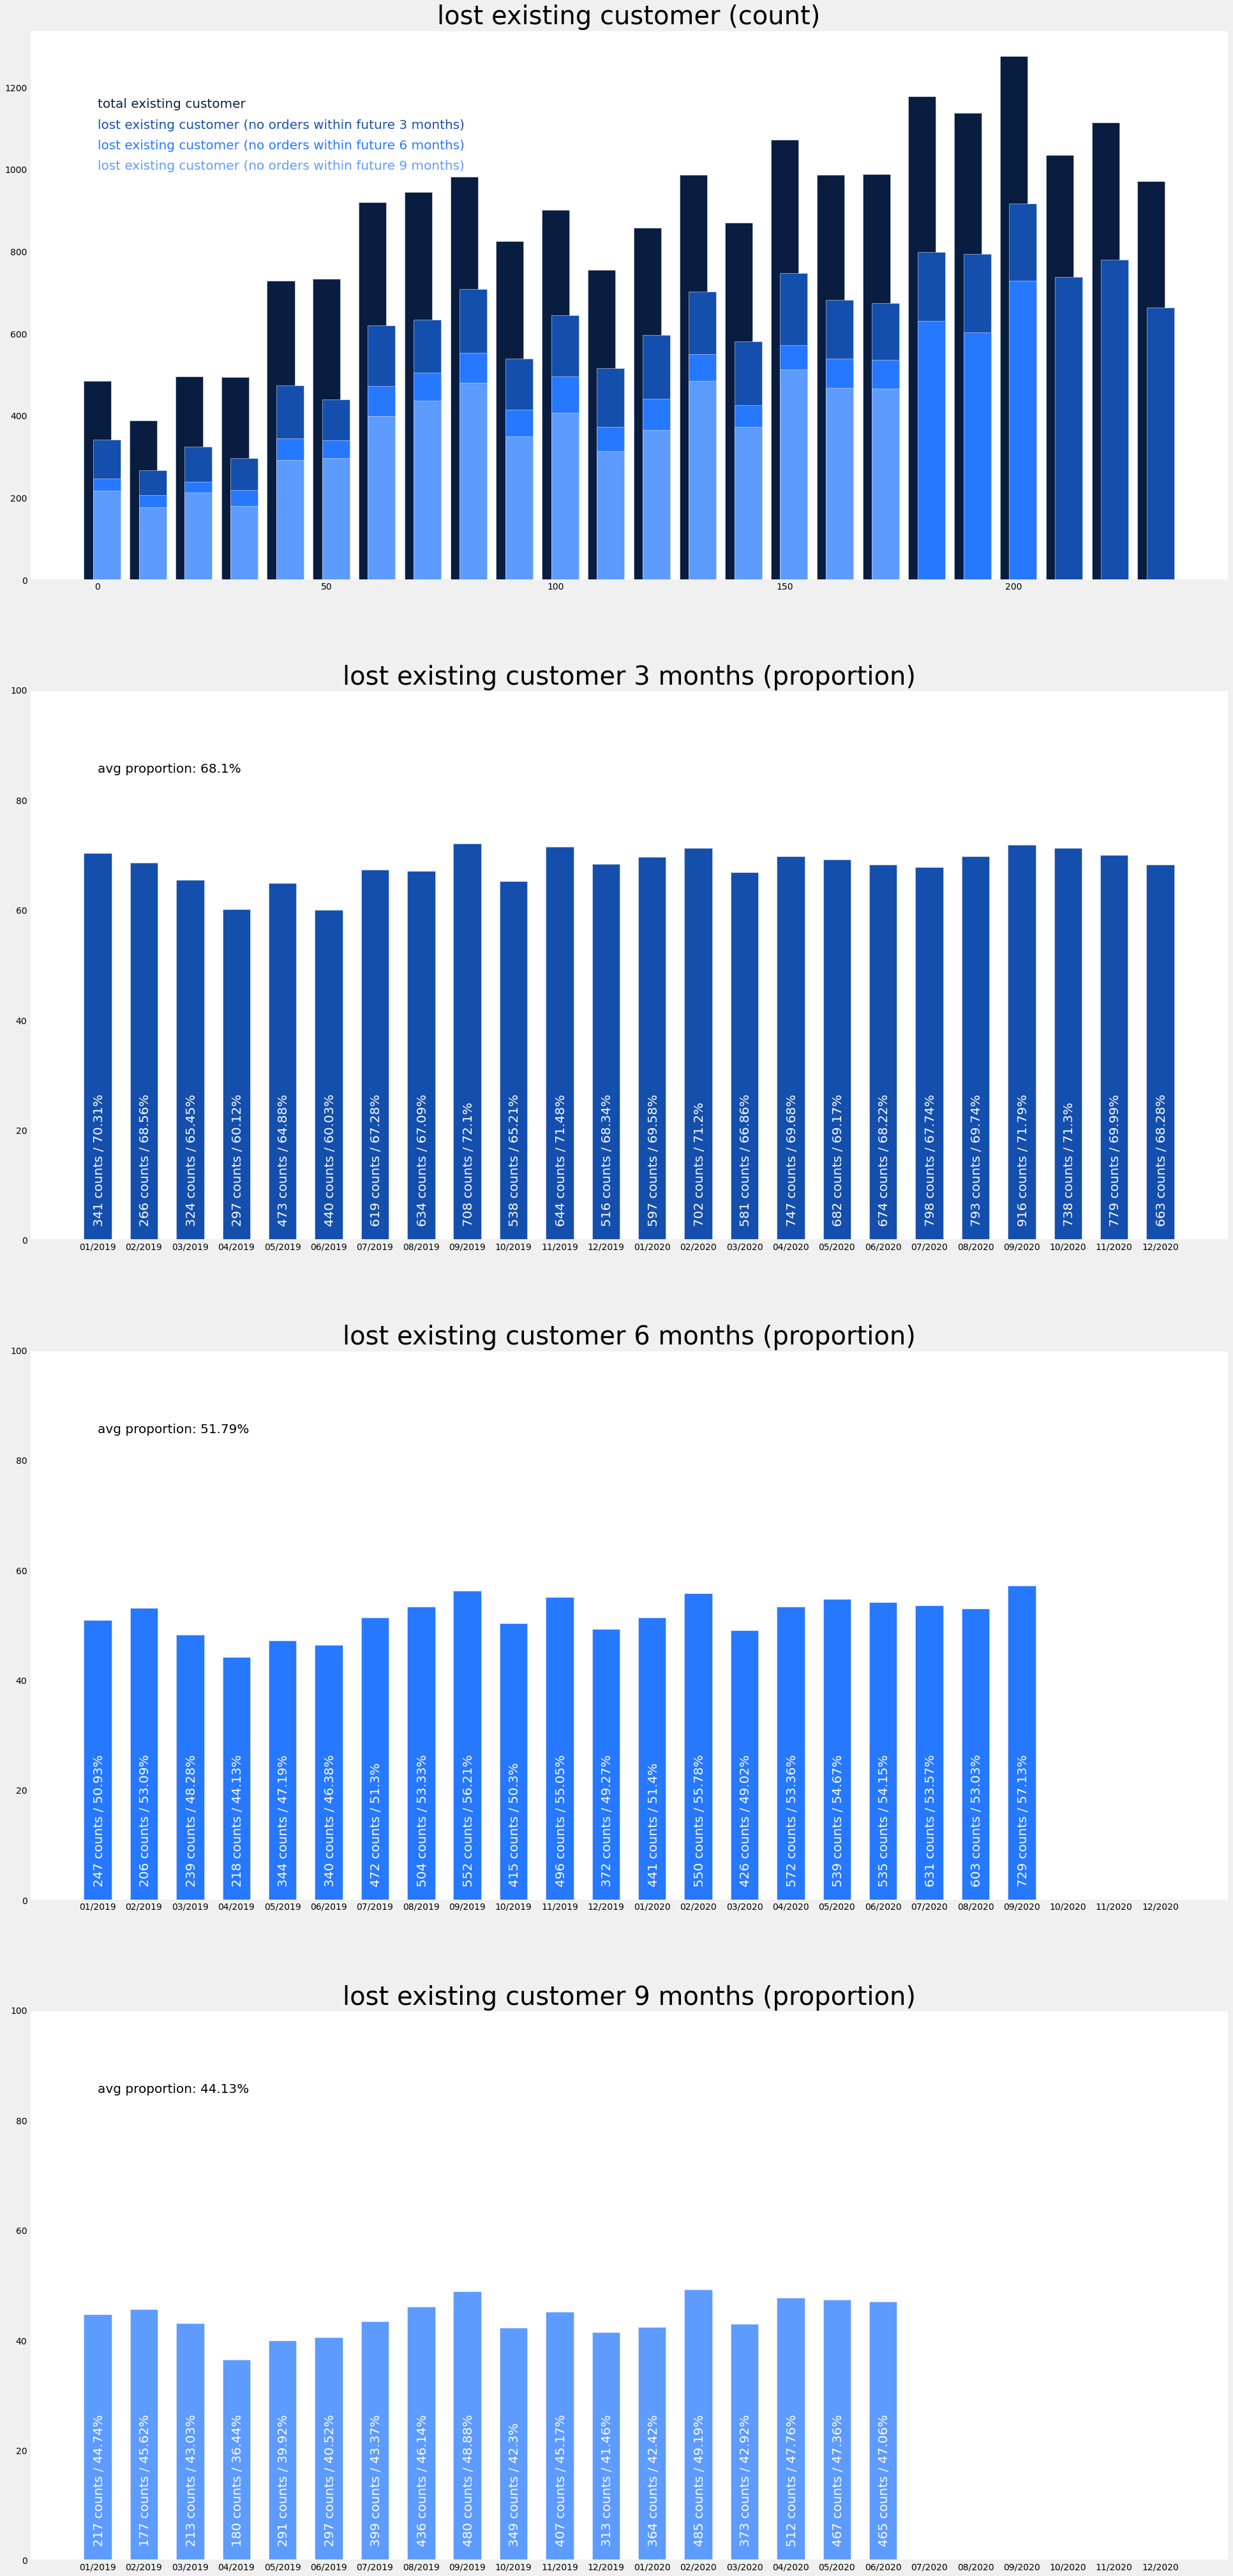

In [13]:
#INPUT START
label2 = True
n = 24
#INPUT END

old_user_lost_3 = []
for i in range(len(more_months)):
    if grand_old_user_list[i] != 0:
        old_user_lost_3.append(np.round(old_lost_3[i] / grand_old_user_list[i] * 100, 2))
    else:
        old_user_lost_3.append(0)
old_user_lost_6 = []
for i in range(len(more_months)):
    if grand_old_user_list[i] != 0:
        old_user_lost_6.append(np.round(old_lost_6[i] / grand_old_user_list[i] * 100, 2))
    else:
        old_user_lost_6.append(0)
old_user_lost_9 = []
for i in range(len(more_months)):
    if grand_old_user_list[i] != 0:
        old_user_lost_9.append(np.round(old_lost_9[i] / grand_old_user_list[i] * 100, 2))
    else:
        old_user_lost_9.append(0)
        
old_user_lost_3 = old_user_lost_3[n:-3]
old_user_lost_6 = old_user_lost_6[n:-3]
old_user_lost_9 = old_user_lost_9[n:-3]
_old_lost_3 = old_lost_3[n:-3]
_old_lost_6 = old_lost_6[n:-3]
_old_lost_9 = old_lost_9[n:-3]
month_3 = more_months[n:-3]

graph, (plot4, plot1, plot2, plot3) = plots.subplots(4)
graph.set_size_inches(30, 68)
wd = 0.6

plot4.set_title("lost existing customer (count)", size = 40)
plot4.set_facecolor("white")
plot4.grid(False)
plot4.bar(range(0, 240, 10), _old_users[:-3], color = blue, width=6)
plot4.bar(range(2, 242, 10), _old_lost_3, color = blue3, width=6)
plot4.bar(range(2, 242, 10), _old_lost_6, color = blue2, width=6)
plot4.bar(range(2, 242, 10), _old_lost_9, color = blue1, width=6)
plot4.annotate("total existing customer", (0,1150), size = 20, color = blue)
plot4.annotate("lost existing customer (no orders within future 3 months)", (0,1100), size = 20, color = blue3)
plot4.annotate("lost existing customer (no orders within future 6 months)", (0,1050), size = 20, color = blue2)
plot4.annotate("lost existing customer (no orders within future 9 months)", (0,1000), size = 20, color = blue1)

plot1.set_title("lost existing customer 3 months (proportion)", size = 40)
plot1.set_facecolor("white")
plot1.grid(False)
plot1.set_ylim([0, 100])
plot1.bar(month_3, old_user_lost_3, color = blue3, width=wd)
plot1.annotate("avg proportion: " + str(np.round(sum(old_user_lost_3) / len(old_user_lost_3),2)) + "%", (0,85), size = 20, color = "black")

plot2.set_title("lost existing customer 6 months (proportion)", size = 40)
plot2.set_facecolor("white")
plot2.grid(False)
plot2.set_ylim([0, 100])
plot2.bar(month_3, old_user_lost_6, color = blue2, width=wd)
plot2.annotate("avg proportion: " + str(np.round(sum(old_user_lost_6) / len(old_user_lost_6[:-3]),2)) + "%", (0,85), size = 20, color = "black")

plot3.set_title("lost existing customer 9 months (proportion)", size = 40)
plot3.set_facecolor("white")
plot3.grid(False)
plot3.set_ylim([0, 100])
plot3.bar(month_3, old_user_lost_9, color = blue1, width=wd)
plot3.annotate("avg proportion: " + str(np.round(sum(old_user_lost_9) / len(old_user_lost_9[:-6]),2)) + "%", (0,85), size = 20, color = "black")


if label2:
    for i in range(len(month_3)):
        plot1.annotate((str(_old_lost_3[i]) + " counts / " + str(old_user_lost_3[i]) + "%")
                        , (i-0.1, 3), size = 20, color = "white", rotation = "vertical")
    for i in range(len(month_3)):
        plot2.annotate((str(_old_lost_6[i]) + " counts / " + str(old_user_lost_6[i]) + "%")
                        , (i-0.1, 3), size = 20, color = "white", rotation = "vertical")
    for i in range(len(month_3)):
        plot3.annotate((str(_old_lost_9[i]) + " counts / " + str(old_user_lost_9[i]) + "%")
                        , (i-0.1, 3), size = 20, color = "white", rotation = "vertical")
#EXPORT        
#graph.savefig("lost exisitng customers.png")
#流失消費者分佈（未來向）

Text(0.5, 1.0, 'expenditure by new customer proportion')

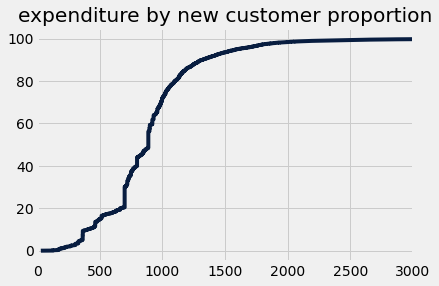

In [14]:
new_user_order_portion = []
new_user_order_avg.sort()
ii = 1
portion = 100 / len(new_user_order_avg)
for _ in range(len(new_user_order_avg)):
    new_user_order_portion.append(portion * ii)
    ii += 1
plots.plot(new_user_order_avg, new_user_order_portion, color = blue)
plots.xlim(0, 3000)
plots.title("expenditure by new customer proportion")
#新客消費金額分佈